In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data = fetch_ucirepo(id=45)

In [3]:
df = data['data']['features'].join(data['data']['targets'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


#### type of data variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


##### Display last five rows of the dataset

In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


##### Experiment with the database by attempting to distinguish presence (values 1,2,3,4) from absence (value 0)

In [6]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

##### he feature 'ca' has missing values that are given as '?'. Let us replace the '?' with nan and then fill those missing values using 'mean' imputation strategy.

In [7]:
imputer = SimpleImputer(strategy='mean')

In [8]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1.0


In [9]:
df['ca'].value_counts()

ca
0.000000    176
1.000000     65
2.000000     38
3.000000     20
0.672241      4
Name: count, dtype: int64

##### Draw a heatmap to understand the correlation between Input features

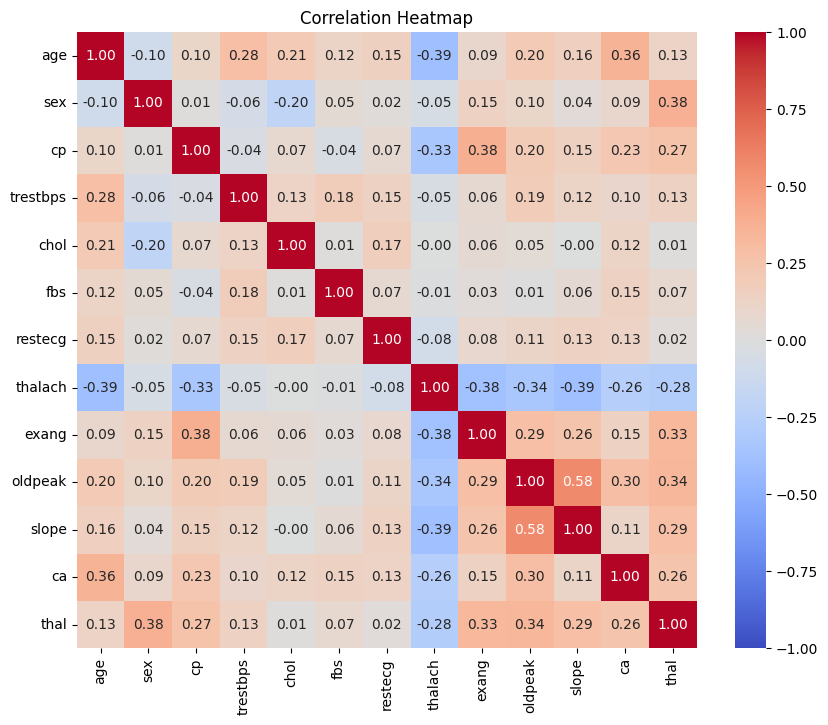

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data['data']['features'].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

##### Split the data for training and testing at 80:20

In [11]:
X = df.drop('num', axis=1)
y = df['num']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

##### Normalizing features for training using Standardscaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Perform Classification using logistic regression and calculate the training score

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
train_score = model.score(X_train_scaled, y_train)
print(f"Training Score: {train_score}")

Training Score: 0.8388429752066116


##### Prepare a confusion matrix and classification report (accuracy, precision etc) for the same

In [18]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.86      0.88        29
         1.0       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



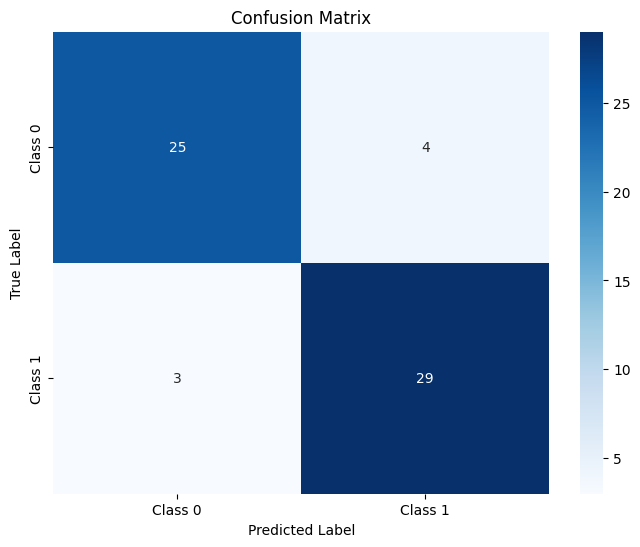

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##### Can you do a Hyperparameter tuning of the logistic regression model with RandomizedSearchCV and GridSearchCV?

In [21]:
logreg = LogisticRegression(max_iter=1000)

param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(
    logreg, param_distributions=param_dist,
    n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

best_logreg_random = random_search.best_estimator_
y_pred_random = best_logreg_random.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Test Accuracy (RandomizedSearchCV): {accuracy_random:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.0006951927961775605}
Best score found:  0.8386054421768708
Test Accuracy (RandomizedSearchCV): 0.87


In [22]:
logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    logreg, param_grid=param_grid,
    cv=5, verbose=1, n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

best_logreg_grid = grid_search.best_estimator_
y_pred_grid = best_logreg_grid.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Test Accuracy (GridSearchCV): {accuracy_grid:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best score found:  0.8346938775510203
Test Accuracy (GridSearchCV): 0.84
